# Data Gathering

## reading 'twitter-archive-enhanced.csv'

In [2]:
import pandas as pd
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## downloading and saving image-predictions.tsv

In [3]:
import csv
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image-predictions.tsv', 'wb').write(r.content)
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## creating 'tweet_json.txt' 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## writing ''tweet_json.txt' into pandas dataframe

In [4]:
list1 = []
with open('tweet_json.txt') as file: 
  
    for line in file: 
        data = line.split(', ')
        for item in data:
            if  "id_str" in item:
                tweet_id = item.split(': ',1)[1].replace('"','')
                break
        for item in data:
            if "retweet_count" in item:
                retweet_count = int(item.split(': ',1)[1])
                break
        for item in data:
            if "favorite_count" in item:
                favourites_count = int(item.split(': ',1)[1])
                break
        dict1 = {'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favourites_count':favourites_count}
        list1.append(dict1)
        
df_3 = pd.DataFrame(list1)
df_3.head()


,favourites_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Data Assessing

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_1.duplicated().any()

False

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_2.duplicated().any()

False

In [10]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favourites_count    2354 non-null int64
retweet_count       2354 non-null int64
tweet_id            2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [11]:
df_3.duplicated().any()

False

In [12]:
df_3.describe()

,favourites_count,retweet_count
count,2354.000000,2354.000000
mean,9804.231946,3238.248938
std,14046.936186,5635.118698
min,52.000000,0.000000
25%,2046.000000,621.250000
50%,4457.500000,1469.500000
75%,12579.250000,3652.000000
max,229185.000000,79515.000000


## Tidiness issues in df_1:
1. The last 4 columns in df_1 '[doggo, floofer, pupper, puppo]' can be written as one column named "stage"
2. the column "rating_denominator" should be droped since it has no information. 
3. In-reply and retweet data is irrelevant and their columns can be dropped.


## Quality issues:
1. 'tweet_id' is intger and should be string.
2. timestamp should be in date time format
3. There are missing names
4. there are incorrect names inculding( 'a', 'an', 'the')
5. there are mising data about 'stage'
6. there are more than one stage in some cases
7. There is mismatch in the number of rows in the dataframes
8. rating numerator have extreme values (>20)1

## Cleaning Tidiness issues:

In [5]:
df1_clean = df_1.copy()
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_denominator'],
               axis='columns', inplace=True) 
df1_clean.replace('None', value='', inplace=True)
df1_clean['stage'] = df1_clean['doggo']+ df1_clean['floofer']+ df1_clean['pupper']+ df1_clean['puppo']
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],
              axis='columns', inplace=True)
df1_clean.head()
    
    

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,


## Merging the data frames

In [6]:
#df1_clean.info()
merge=pd.merge(df1_clean,df_2, on='tweet_id')
merge['tweet_id'] = merge['tweet_id'].astype(str)
df = pd.merge(merge,df_3, on='tweet_id')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourites_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id            2073 non-null object
timestamp           2073 non-null object
source              2073 non-null object
text                2073 non-null object
expanded_urls       2073 non-null object
rating_numerator    2073 non-null int64
name                2073 non-null object
stage               2073 non-null object
jpg_url             2073 non-null object
img_num             2073 non-null int64
p1                  2073 non-null object
p1_conf             2073 non-null float64
p1_dog              2073 non-null bool
p2                  2073 non-null object
p2_conf             2073 non-null float64
p2_dog              2073 non-null bool
p3                  2073 non-null object
p3_conf             2073 non-null float64
p3_dog              2073 non-null bool
favourites_count    2073 non-null int64
retweet_count       2073 non-null int64
dtypes: bool(3), float64(3), int64(4), 

# cleaning the merged df

In [24]:
df_clean = df.copy()
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['name'].replace(['a', 'an', 'the', ''], value='Not Given', inplace=True)
df_clean['stage'].replace(['doggopupper','doggopuppo','doggofloofer' ,''], 'Not Given', inplace=True)
df_clean = df_clean[df_clean['rating_numerator']<=20]
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favourites_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,Not Given,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,Not Given,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,Not Given,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,Not Given,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,Not Given,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


# sorting columns and saving a maeter dataframe

In [32]:
columns = ['tweet_id', 'timestamp', 'name', 'stage', 'rating_numerator', 'favourites_count',
          'retweet_count', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
          'p3', 'p3_conf', 'p3_dog', 'source', 'text', 'expanded_urls','jpg_url']
df_clean = df_clean[columns]
df_clean.to_csv('twitter_archive_master.csv', index= False)
df_clean.head()

,tweet_id,timestamp,name,stage,rating_numerator,favourites_count,retweet_count,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source,text,expanded_urls,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Phineas,Not Given,13,39467,8853,1,orange,0.097049,...,bagel,0.085851,False,banana,0.076110,False,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Tilly,Not Given,13,33819,6514,1,Chihuahua,0.323581,...,Pekinese,0.090647,True,papillon,0.068957,True,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Archie,Not Given,12,25461,4328,1,Chihuahua,0.716012,...,malamute,0.078253,True,kelpie,0.031379,True,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Darla,Not Given,13,42908,8964,1,paper_towel,0.170278,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Franklin,Not Given,12,41048,9774,2,basset,0.555712,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


# Analysis and Visualization

## Stages mean rating

In [26]:
df_clean.groupby('stage')['rating_numerator'].mean()

stage
Not Given    10.502860
doggo        11.970149
floofer      12.000000
pupper       10.674641
puppo        12.000000
Name: rating_numerator, dtype: float64

In [20]:
df_clean.groupby('stage')['rating_numerator'].std()

stage
Not Given    4.981798
doggo        1.476792
floofer      1.154701
pupper       2.064885
puppo        1.279204
Name: rating_numerator, dtype: float64

## correlation between favoratie_count and retweet_count

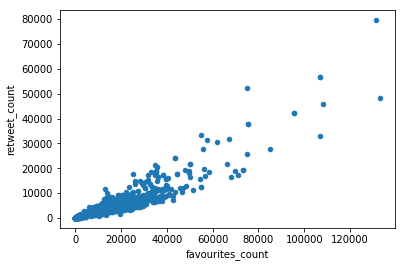

In [27]:
% matplotlib inline
df_clean.plot.scatter('favourites_count','retweet_count')

## tweets per month

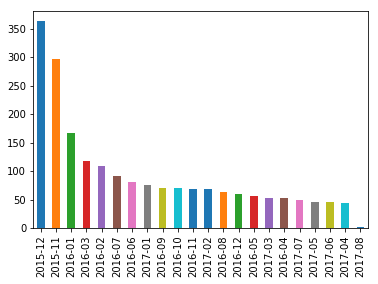

In [28]:
df_clean['month_year'] = pd.to_datetime(df_clean['timestamp']).dt.to_period('M')
df_clean['month_year'].value_counts().plot.bar()

## correlation between both 'favourites_count',  'retweet_count' and 'rating_numerator'

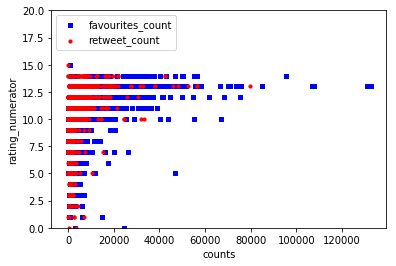

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_clean['favourites_count'], df_clean['rating_numerator'] , s=10, c='b', marker="s", label='favourites_count')
ax1.scatter(df_clean['retweet_count'], df_clean['rating_numerator'] , s=10, c='r', marker="o", label='retweet_count')
plt.ylim(0, 20)
plt.xlabel('counts')
plt.ylabel('rating_numerator')
plt.legend(loc='upper left');
plt.show()

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id            2054 non-null object
timestamp           2054 non-null datetime64[ns]
name                2054 non-null object
stage               2054 non-null object
rating_numerator    2054 non-null int64
favourites_count    2054 non-null int64
retweet_count       2054 non-null int64
img_num             2054 non-null int64
p1                  2054 non-null object
p1_conf             2054 non-null float64
p1_dog              2054 non-null bool
p2                  2054 non-null object
p2_conf             2054 non-null float64
p2_dog              2054 non-null bool
p3                  2054 non-null object
p3_conf             2054 non-null float64
p3_dog              2054 non-null bool
source              2054 non-null object
text                2054 non-null object
expanded_urls       2054 non-null object
jpg_url             2054 non-null object
month_year          2054 non-nu